# GRIP @ The Spark Foundation
# Data Science and Business Analytics Intern
## Author: Vikram Khanzode
## Task 5: Exploratory Data Analysis - Sports


### Importing Packages

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and Exploring the Dataset for Matches

In [320]:
matches_df = pd.read_csv("matches.csv")

In [321]:
matches_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [322]:
matches_df.shape

(756, 18)

In [323]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

### Finding out Top Players with most "Player of Match" Awards

In [324]:
matches_df['player_of_match'].value_counts()[0:20]

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
AM Rahane         12
MEK Hussey        12
A Mishra          11
V Sehwag          11
DR Smith          11
AD Russell        11
JH Kallis         10
KA Pollard        10
SP Narine          9
SE Marsh           9
Name: player_of_match, dtype: int64

In [325]:
pom_list = list(matches_df['player_of_match'].value_counts()[0:20].keys())
pom_counts= list(matches_df['player_of_match'].value_counts()[0:20])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

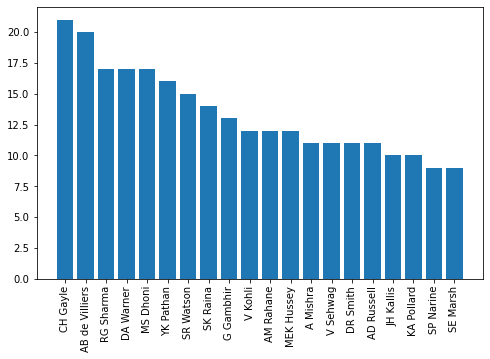

In [326]:
plt.figure(figsize=(8,5))
plt.bar(pom_list, pom_counts)
plt.xticks(rotation='vertical')

### When do teams win matches the most, batting first or batting second?

In [327]:
matches_df['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [328]:
import numpy as np
np.sum(matches_df['toss_winner']==matches_df['winner'])
toss_win_conversion = (np.sum(matches_df['toss_winner']==matches_df['winner'])/len(matches_df))*100
toss_win_conversion

51.98412698412699

In [329]:
batting_first=matches_df[matches_df['win_by_runs']!=0]
batting_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


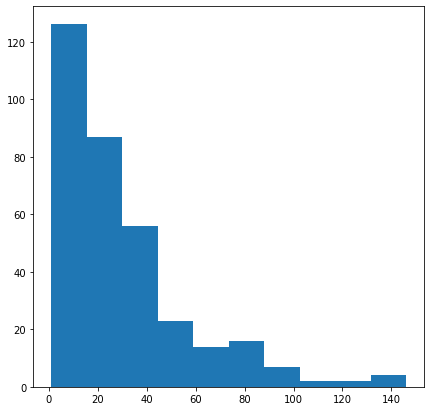

In [330]:
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'])
plt.show()

In [331]:
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

In [332]:
b1_team_list = list(batting_first['winner'].value_counts()[0:4].keys())
b1_team_wins = list(batting_first['winner'].value_counts()[0:4])

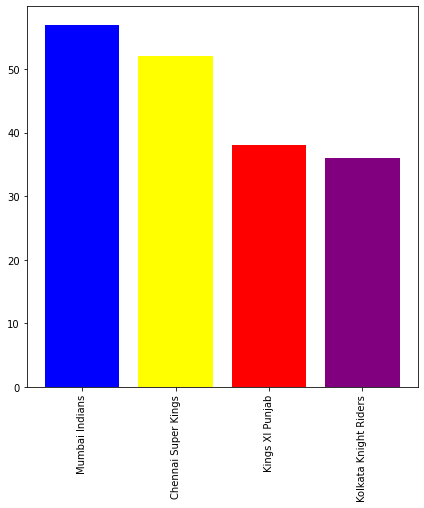

In [333]:
plt.figure(figsize=(7,7))
plt.bar(b1_team_list, b1_team_wins, color=["blue","yellow","red","purple"])
plt.xticks(rotation='vertical')
plt.show()

In [334]:
batting_second= matches_df[matches_df['win_by_wickets']!=0]
batting_second.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


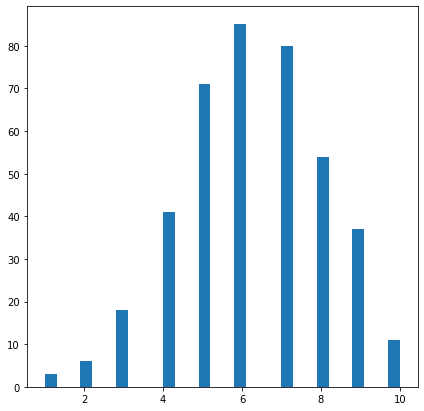

In [335]:
plt.figure(figsize=(7,7))
plt.hist(batting_second['win_by_wickets'],bins=30)
plt.show()

In [336]:
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [337]:
b2_team_list = list(batting_second['winner'].value_counts()[0:4].keys())
b2_team_wins = list(batting_second['winner'].value_counts()[0:4])

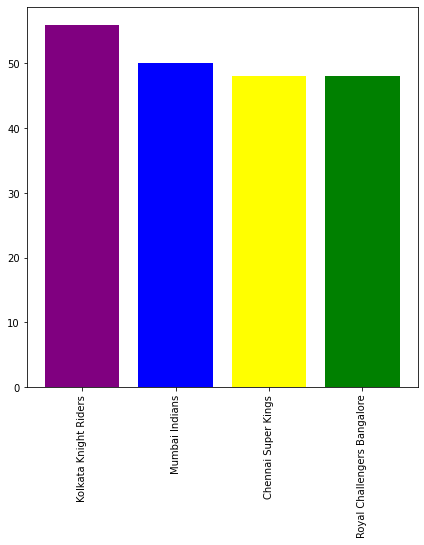

In [338]:
plt.figure(figsize=(7,7))
plt.bar(b2_team_list, b2_team_wins,color=["purple","blue","yellow","green"])
plt.xticks(rotation='vertical')
plt.show()

In [339]:
matches_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [340]:
team_list = list(matches_df['winner'].value_counts().keys())
team_wins = list(matches_df['winner'].value_counts())

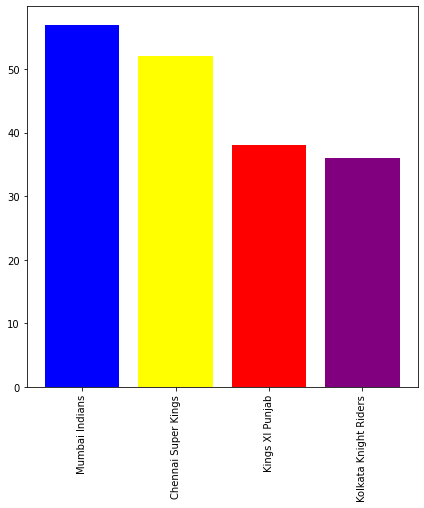

In [341]:
plt.figure(figsize=(7,7))
plt.bar(b1_team_list, b1_team_wins, color=['blue','yellow','red','purple'])
plt.xticks(rotation='vertical')
plt.show()

### Reading and Exploring the Dataset for Deliveries

In [342]:
balls_df = pd.read_csv('deliveries.csv')
balls_df2 = balls_df.copy()

In [343]:
balls_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [344]:
balls_df.shape

(179078, 21)

In [345]:
balls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### Exploring Top Run-Scoring Batters

In [346]:
batter_runs_df = balls_df.groupby('batsman').sum()
cols_to_remove = ['match_id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'extra_runs', 'total_runs']
batter_runs_df.drop(cols_to_remove, axis=1,inplace=True)
batter_runs_df.sort_values(by='batsman_runs', ascending=False, inplace=True)
batter_runs_df.head(100)

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
...,...
JD Ryder,604
PP Chawla,587
HM Amla,577


(array([344.,  44.,  29.,  12.,  11.,  11.,   6.,  11.,   5.,   7.,   4.,
          4.,   3.,   3.,   1.,   6.,   0.,   1.,   1.,   1.,   1.,   1.,
          0.,   1.,   3.,   2.,   1.,   1.,   0.,   2.]),
 array([   0.        ,  181.13333333,  362.26666667,  543.4       ,
         724.53333333,  905.66666667, 1086.8       , 1267.93333333,
        1449.06666667, 1630.2       , 1811.33333333, 1992.46666667,
        2173.6       , 2354.73333333, 2535.86666667, 2717.        ,
        2898.13333333, 3079.26666667, 3260.4       , 3441.53333333,
        3622.66666667, 3803.8       , 3984.93333333, 4166.06666667,
        4347.2       , 4528.33333333, 4709.46666667, 4890.6       ,
        5071.73333333, 5252.86666667, 5434.        ]),
 <a list of 30 Patch objects>)

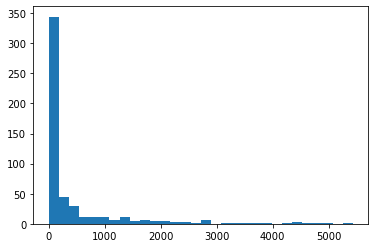

In [347]:
plt.hist(batter_runs_df['batsman_runs'],bins = 30)

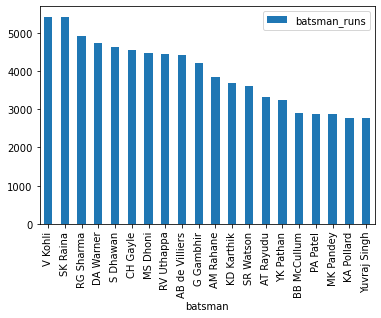

In [348]:
batter_runs_df.head(20).plot(kind='bar')

### Exploring Top Wicket-Taking Bowlers

In [349]:
wicketball = balls_df2.groupby('bowler').count()

In [350]:
cols1= ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'batsman', 'non_striker', 'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs', 'dismissal_kind', 'fielder']
wicketball.drop(cols1, axis=1, inplace=True)

In [351]:
wicketball.rename(columns={'player_dismissed':'wickets'}, inplace=True)
wicketball.sort_values(by='wickets', ascending=False, inplace=True)
wicketball

,ball,wickets
bowler,,
SL Malinga,2974,188
DJ Bravo,2711,168
A Mishra,3172,165
Harbhajan Singh,3451,161
PP Chawla,3157,156
...,...,...
BJ Rohrer,7,0
RA Tripathi,6,0
RA Shaikh,6,0


In [352]:
wicketball['W/over'] = wicketball['wickets']/(wicketball['ball']/6)

,ball,wickets,W/over
bowler,,,
SL Malinga,2974,188,0.379287
DJ Bravo,2711,168,0.371819
A Mishra,3172,165,0.312106
Harbhajan Singh,3451,161,0.279919
PP Chawla,3157,156,0.296484
...,...,...,...
BJ Rohrer,7,0,0.000000
RA Tripathi,6,0,0.000000
RA Shaikh,6,0,0.000000


In [353]:
wicketball.drop('ball', axis=1, inplace=True)
wicketball

,wickets,W/over
bowler,,
SL Malinga,188,0.379287
DJ Bravo,168,0.371819
A Mishra,165,0.312106
Harbhajan Singh,161,0.279919
PP Chawla,156,0.296484
...,...,...
BJ Rohrer,0,0.000000
RA Tripathi,0,0.000000
RA Shaikh,0,0.000000


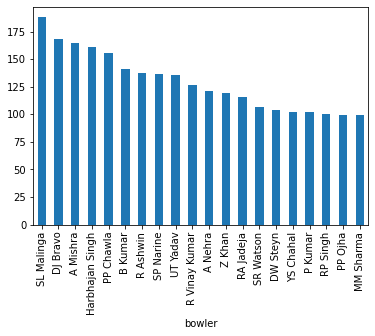

In [356]:
wicketball['wickets'].head(20).plot(kind='bar')

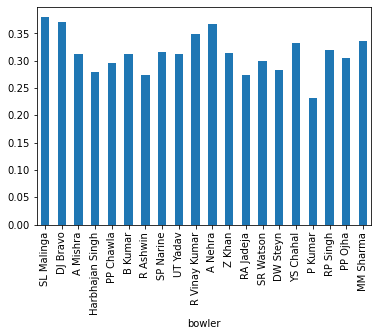

In [358]:
wicketball['W/over'].head(20).plot(kind='bar')